In [8]:
import yfinance as yf
import pandas as pd
import missingno
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import keras
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data= yf.download(["SPY"], start="2019-01-01",end="2022-12-20",index_as_date = False, interval="1d")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,234.061615,126925200
2019-01-03,248.229996,248.570007,243.669998,244.210007,228.476273,144140700
2019-01-04,247.589996,253.110001,247.169998,252.389999,236.129242,142628800
2019-01-07,252.690002,255.949997,251.690002,254.380005,237.991043,103139100
2019-01-08,256.820007,257.309998,254.000000,256.769989,240.227036,102512600
...,...,...,...,...,...,...
2022-12-13,410.220001,410.489990,399.070007,401.970001,400.132599,123782500
2022-12-14,401.609985,405.500000,396.309998,399.399994,397.574341,108111300
2022-12-15,394.299988,395.250000,387.890015,389.630005,387.848999,117705900


In [12]:
price=data["Adj Close"].values
values=price

In [4]:
price

array([234.06161499, 228.47627258, 236.12924194, 237.99104309,
       240.22703552, 241.3497467 , 242.20108032, 242.29464722,
       240.81643677, 243.57640076, 244.16581726, 246.01824951,
       249.29272461, 245.92466736, 246.4392395 , 246.57022095,
       248.65655518, 246.76673889, 246.4392395 , 250.34051514,
       252.53916931, 252.66079712, 254.43836975, 255.50494385,
       255.16816711, 252.73568726, 253.04434204, 253.18473816,
       256.44049072, 257.27319336, 256.70254517, 259.49987793,
       259.94885254, 260.47286987, 259.54669189, 261.15576172,
       261.51132202, 261.32418823, 261.21191406, 260.72543335,
       262.35333252, 261.39907837, 261.04351807, 259.46240234,
       257.29190063, 256.77728271, 260.50097656, 261.48321533,
       263.21408081, 263.04571533, 264.34527588, 265.30374146,
       265.36953735, 264.57077026, 267.55905151, 262.40951538,
       262.2121582 , 264.16677856, 262.78533936, 263.78146362,
       265.44470215, 268.59268188, 268.72427368, 269.14

In [5]:
len(price)

1000

In [6]:
size_training=int(0.8*len(price))
size_testing=len(price)-size_training

In [13]:
training_data_len = size_training
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [14]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
def create_training_set(train_data):
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        print(i)
        x_train.append(train_data[i-60:i])
        y_train.append(train_data[i])
    return np.array(x_train,dtype=np.float64),np.array(y_train,dtype=np.float64)


In [16]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(50, return_sequences=False))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 72,301
Trainable params: 72,301
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='mean_squared_error',)
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
740/740 [==============================] - 9s 10ms/step - loss: 0.0075
Epoch 2/3
740/740 [==============================] - 7s 10ms/step - loss: 0.0028
Epoch 3/3
740/740 [==============================] - 7s 10ms/step - loss: 0.0021


In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7/7 [==============================] - 0s 7ms/step


6.8500634765625

C:\Users\Kamitsuki\AppData\Local\Temp\ipykernel_5632\734735441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


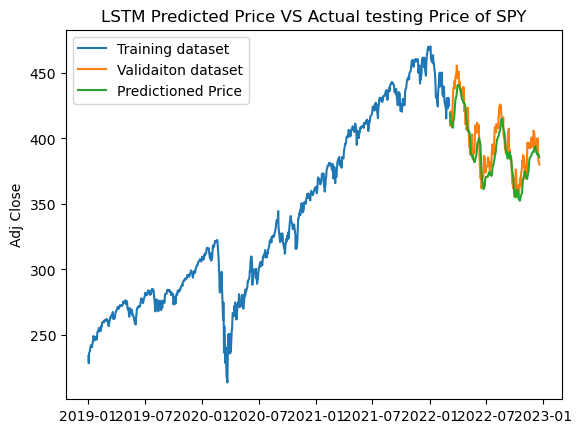

In [19]:
data = data.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.title('LSTM Predicted Price VS Actual testing Price of SPY')
plt.ylabel('Adj Close')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Training dataset', 'Validaiton dataset', 'Predictioned Price'])
plt.show()

In [20]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(50, return_sequences=False))
model.add(layers.Dense(25,activation='relu'))
model.add(layers.Dense(13,activation='relu'))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error',)
model.fit(x_train, y_train, batch_size= 1, epochs=3)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 13)                338       
                                                                 
 dense_4 (Dense)             (None, 1)                 14        
                                                                 
Total params: 72,627
Trainable params: 72,627
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


KeyboardInterrupt: 

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(50, return_sequences=False))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error',)
model.fit(x_train, y_train, batch_size= 1, epochs=3)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(200, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(25,activation='relu'))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error',)
model.fit(x_train, y_train, batch_size= 1, epochs=3)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [21]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(50, return_sequences=False))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error',)
model.fit(x_train, y_train, batch_size= 1, epochs=10)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 25)                1275      
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
Total params: 72,301
Trainable params: 72,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
740/740 [==============================

17.848582458496093